In [12]:
pip install requests pandas matplotlib spotipy google-api-python-client textblob


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
API_KEY = "621136cc232cd3acacfec6e180971b50"
CITY_NAME = 'Tokyo'

url = f"https://api.openweathermap.org/data/2.5/weather?q={CITY_NAME}&appid={API_KEY}&units=metric"

response = requests.get(url)

data = response.json()

print(data)





{'coord': {'lon': 139.6917, 'lat': 35.6895}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 5.27, 'feels_like': -0.13, 'temp_min': 3.7, 'temp_max': 5.91, 'pressure': 1023, 'humidity': 34, 'sea_level': 1023, 'grnd_level': 1021}, 'visibility': 10000, 'wind': {'speed': 10.29, 'deg': 330}, 'clouds': {'all': 0}, 'dt': 1739269730, 'sys': {'type': 2, 'id': 268395, 'country': 'JP', 'sunrise': 1739223169, 'sunset': 1739261897}, 'timezone': 32400, 'id': 1850144, 'name': 'Tokyo', 'cod': 200}


In [19]:
if "main" in data:
    city = data["name"]
    temp = data["main"]["temp"]
    humidity = data["main"]["humidity"]
    weather = data["weather"][0]["description"]

    print(f"City: {city}\nTemperature: {temp}°C\nHumidity: {humidity}%\nWeather: {weather}")
else:
    print("Error fetching weather data.")

City: Tokyo
Temperature: 5.27°C
Humidity: 34%
Weather: clear sky


In [22]:
data_dict = {
    "City": [city],
    "Temperature (°C)": [temp],
    "Humidity (%)": [humidity],
    "Weather Description" : [weather]
}

weather_df = pd.DataFrame(data_dict)
print(weather_df)


    City  Temperature (°C)  Humidity (%) Weather Description
0  Tokyo              5.27            34           clear sky


In [23]:
weather_df.to_csv("weather_data.cvs", index=False)
print("Data saved to weather_data.cvs")

Data saved to weather_data.cvs


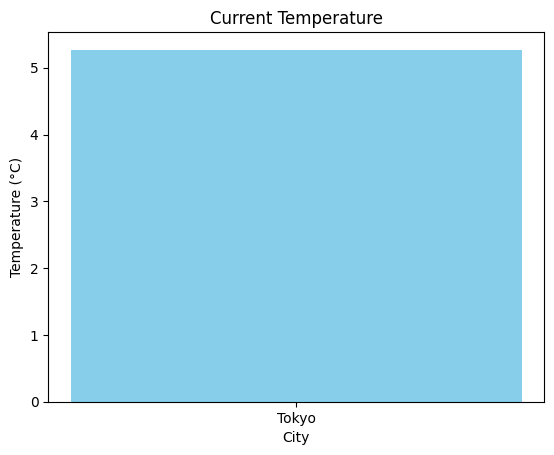

In [29]:
plt.Figure(figsize=(6,4))
plt.bar(weather_df["City"], weather_df["Temperature (°C)"], color='skyblue')
plt.xlabel("City")
plt.ylabel("Temperature (°C)")
plt.title("Current Temperature")
plt.show()